## 1. SVD vs. AM

In class, you learned about two ways of solving PCA. Let's compare them. The data you will use is from part h of the airbnb homework. 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'airbnb_hw6.csv' contains the full dataset we will use throughout this assignment (Y_full). Because it is big, we will start by only looking at the first third of the data (Y).

In [10]:
# data
Y_full = pd.read_csv('airbnb_hw6.csv', header=None)
n_full, d = Y_full.shape
Y = Y_full.iloc[0:n_full//3]

Y = Y.to_numpy()
Y_full = Y_full.to_numpy()
print(Y.shape)
print(Y_full.shape)

(1942, 4905)
(5828, 4905)


#### a) Top-k SVD and residual error.
For the airbnb data and for $k = 1,2,...,10$, compute the top-k SVD 
$U_k \Sigma_k V_k^T$
and the residual error
$||Y - U_k \Sigma_k V_k^T||.$

In [11]:
u, s, vh = np.linalg.svd(Y, full_matrices = False)
u.shape, s.shape, vh.shape

((1942, 1942), (1942,), (1942, 4905))

In [12]:
n = 10
errors = np.zeros(n)
for i in range(1, n + 1):
    y_hat = np.dot(u[:, :i] * s[:i], vh[:i, :])
    errors[i - 1] = np.linalg.norm(Y - y_hat)

In [13]:
for i in range(n):
    print("The residual error for k = " + str(i+1) + " is " + str(errors[i]) + ".")

The residual error for k = 1 is 13328.119359502925.
The residual error for k = 2 is 8966.290861516709.
The residual error for k = 3 is 6173.28688467183.
The residual error for k = 4 is 3594.481072732783.
The residual error for k = 5 is 2885.6231781230344.
The residual error for k = 6 is 2323.6981005414714.
The residual error for k = 7 is 1673.1751793388185.
The residual error for k = 8 is 1149.67773569802.
The residual error for k = 9 is 683.3954132589105.
The residual error for k = 10 is 411.8372483468526.


#### b) Plot the residual error as a function of $k$. 
What do you observe? Would you say the top $k$ SVD is a good approximation?  For what $k$?

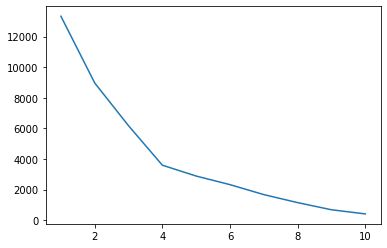

In [14]:
x = range(1, n + 1)
y = errors
plt.plot(x, y)

__Response__: The error decreases almost exponentially with k. Top-k SVD is indeed a good approximation. As we increase k, we eventually encounter diminishing benefits. For this problem though, a good k is probably 10, since the error curve is still pretty steep even at 10. If we increase the range of possible k to the set of integers from 1 to 20, though, we can find that the graph takes a "knee" at around 13 and that is probably is good value of k.

#### c) Alternating minimization

Set $k=10$. Generate a random starting matrix $W \in \mathbb{R}^{k \times d}$ with `np.random.randn`. Use least squares to solve 
$$ \mbox{minimize}\quad\|Y - XW\|_F^2 $$
for $X$. Now fix that $X$ and use least squares to solve for $W$. Repeat this 10 times (ie, 10 solves each for $X$ and $W$). (Cache the Gram matrix for each least squares problem for a faster solve!)

In [15]:
W = np.random.randn(10, 4905)
for i in range(10):
    res = np.linalg.lstsq(W.T, Y.T)
    X = res[0].T
    res = np.linalg.lstsq(X, Y)
    W = res[0]

/var/folders/v3/87m7w99s42n4xpqtn5t4138m0000gn/T/ipykernel_87509/3421148907.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  res = np.linalg.lstsq(W.T, Y.T)
/var/folders/v3/87m7w99s42n4xpqtn5t4138m0000gn/T/ipykernel_87509/3421148907.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  res = np.linalg.lstsq(X, Y)


In [16]:
print('The error at k = 10 is ' + str(np.linalg.norm(Y - np.dot(X, W))) + ".")

The error at k = 10 is 411.83724834685523.


#### d) Plot the residual error $|| Y - XW ||$ as a function of iteration.

In [17]:
n = 10
k = 10
errors = np.zeros(n)
W = np.random.randn(k, 4905)
for i in range(n):
    res = np.linalg.lstsq(W.T, Y.T)
    X = res[0].T
    res = np.linalg.lstsq(X, Y)
    W = res[0]
    errors[i] = np.linalg.norm(Y - np.dot(X, W))

/var/folders/v3/87m7w99s42n4xpqtn5t4138m0000gn/T/ipykernel_87509/4003475721.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  res = np.linalg.lstsq(W.T, Y.T)
/var/folders/v3/87m7w99s42n4xpqtn5t4138m0000gn/T/ipykernel_87509/4003475721.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  res = np.linalg.lstsq(X, Y)


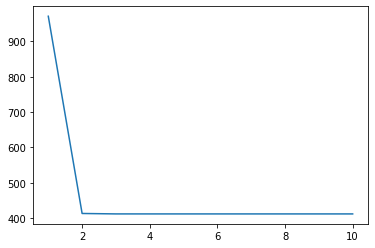

In [18]:
x = range(1, n + 1)
y = errors
plt.plot(x, y)

#### e) How do the two methods compare?

In particular, compare the residual error when $k=10$.

__Response:__ As the number of iterations increases, the second method's result will converge to the first method's result. This is true for any k, including k = 10.

#### f) PCA on the full dataset (approximately)

Ideally, we would like to apply PCA to the full dataset, but even the small subset takes a while.

In the AM method, $W$ has as many columns as $Y$, while $X$ has as many rows as $Y$. The full dataset has more rows, so we could fix the same $W$ we derived for the small dataset, and use this to find $X_\text{full}$ for the full dataset by solving 
$$\mbox{minimize} \|Y_\text{full} - X_\text{full} W\|_F^2 $$
with variable $X$.
That is, we fix $W$ and take one more step of AM (using $Y_\text{full}$) to compute $X_{full}$. 

How does the new average residual error per row compare to the previous average residual error per row?

In [19]:
res = np.linalg.lstsq(W.T, Y_full.T)
X_full = res[0].T

/var/folders/v3/87m7w99s42n4xpqtn5t4138m0000gn/T/ipykernel_87509/3632342700.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  res = np.linalg.lstsq(W.T, Y_full.T)


In [20]:
errors_old = np.zeros(1942)
for i in range(1942):
    errors_old[i] = np.linalg.norm(Y[i] - (np.dot(X, W)[i]))
avg_old = np.mean(errors_old)
errors_new = np.zeros(5828)
for i in range(5828):
    errors_new[i] = np.linalg.norm(Y_full[i] - (np.dot(X_full, W)[i]))
avg_new = np.mean(errors_new)

In [21]:
print("The old average error per row is " + str(avg_old) + '.')
print("The new average error per row is " + str(avg_new) + '.')

The old average error per row is 6.8396335663389225.
The new average error per row is 7.012520210910788.


__Response:__ The new average error per row is lower than the previous average error. This is because we directly adopted the old W without further optimizing it.